## Finding true positives and false negatives for gating    

Use cellpose2 conda environment

In [1]:
import numpy as np
import pandas as pd
import os
import re
import cellpose
import tifffile
from cellpose import plot
import matplotlib.pyplot as plt
%matplotlib inline

/stor/home/jfm2773/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Functions

In [8]:
def centroid_cell_type_mask(quant_df, mask):
    ## Plotting square for each centroid 
    centroid_mask = np.zeros(mask.shape, dtype= "uint16")

    for X_centroid, Y_centroid, cell_id in zip(quant_df["X_centroid"], quant_df["Y_centroid"], quant_df["CellID"]):
        ## Can only use integers to index
        X_centroid = round(X_centroid)
        Y_centroid = round(Y_centroid)

        centroid_mask[Y_centroid-20:Y_centroid+20, X_centroid-20:X_centroid+20] = cell_id

    return centroid_mask

def gating_overlay_wrapper(img_dir, gating_name, cell_type, mask_name, img_name,  
                           subset = True):
    
    ## Load gating data
    quant_df = pd.read_csv(os.path.join(img_dir, gating_name))
    quant_df = quant_df[quant_df["cell_type"] == cell_type]
    print("Load_mask")
    mask = tifffile.imread(os.path.join(img_dir, mask_name))

    print("Make centroid mask")
    centroid_mask = centroid_cell_type_mask(quant_df= quant_df, mask = mask)
    tifffile.imwrite(os.path.join(img_dir, "centroid_mask.tif"), centroid_mask)

    print("Converting mask to binary and shrinking to uint8")
    centroid_mask[centroid_mask > 0] = 255
    centroid_mask = centroid_mask.astype("uint8")
    tifffile.imwrite(os.path.join(img_dir, cell_type + "_binary_centroid_mask.tif"), centroid_mask)
    
    print("Overlaying centroids on markers")
    img = tifffile.imread(os.path.join(img_dir, img_name))
    centroid_mask = centroid_mask[np.newaxis,...]
    region_w_centroids = np.concatenate((img, centroid_mask))

    tifffile.imwrite(os.path.join(img_dir, cell_type + "_img_w_centroids.ome.tif"), region_w_centroids)

    if(subset):
        print("Writing 50% subsetted image")
        upper_bound = round(min(centroid_mask.shape[1:3])/2)
        region_w_centroids = region_w_centroids[:, :, 1_000:upper_bound]
        # region_w_centroids = region_w_centroids[:, 4_000:8_000, 4_000:8_000] # I used this for CD14_A
        tifffile.imwrite(os.path.join(img_dir, cell_type + "_subset_region_w_centroids.ome.tif"), region_w_centroids)

    return None

In [3]:
raw_dir="/stor/scratch/Ehrlich/Users/John/histocytometry/raw_images/images_2023-08-10"
img_dirs= [os.path.join(raw_dir, img_dir) for img_dir in os.listdir(raw_dir) if re.search("_[A-D]$", img_dir) and not re.search("_Sirpa_C$|CD207_CD11c_XCR1_C$", img_dir)]

In [11]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_B220_CD11c_SiglecH_A")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "pDC", 
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif", 
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [13]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_B220_CD11c_SiglecH_B")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "pDC", 
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif", 
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [14]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_B220_CD11c_SiglecH_C")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "pDC", 
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif", 
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [9]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_CD63_CD11c_Sirpa_A")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "aDC2", 
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif",
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [10]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_CD63_CD11c_Sirpa_B")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "aDC2", 
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif",
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [11]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_CD63_CD11c_Sirpa_D")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "aDC2", 
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif",
                       subset      = True)
    ## This one has a really bad Sirpa stain.

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [12]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_CD207_CD11c_XCR1_A")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "CD207+cDC1", 
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif",
                       subset      = True)
    ## This one is oversegmenting quite badly.

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [13]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_CD207_CD11c_XCR1_B")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "CD207+cDC1", 
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif",
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [14]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_CD207_CD11c_XCR1_D")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "CD207+cDC1", 
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif",
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [15]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_CD63_CD11c_XCR1_A")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "aDC1",  
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif",
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [16]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_CD63_CD11c_XCR1_B")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "aDC1",  
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif",
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [17]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_CD63_CD11c_XCR1_C")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "aDC1",  
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif",
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [18]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_CD63_CD11c_XCR1_D")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "aDC1",  
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif",
                       subset      = True)
## This one has some capsule issues.

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [19]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_Sirpa_CD11c_CD14_A")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "CD14+cDC2",
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif",
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [20]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_Sirpa_CD11c_CD14_B")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "CD14+cDC2",
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif",
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [21]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_Sirpa_CD11c_CD14_C")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "CD14+cDC2",
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif",
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [22]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_Sirpa_CD63_MerTK_A")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "aDC2",
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif",
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [23]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_Sirpa_CD63_MerTK_A")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "Macrophage",
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif",
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [24]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_Sirpa_CD63_MerTK_B")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "aDC2",
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif",
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [25]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_Sirpa_CD63_MerTK_B")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "Macrophage",
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif",
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [26]:
img_dir = os.path.join(raw_dir, "20x_pan_DAPI_Sirpa_CD63_MerTK_D")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "aDC2",
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "reordered_image_w_thymus_regions_50um.ome.tif",
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


# Old code below

In [62]:
img_dir = os.path.join(raw_dir, "cortex_20x_pan_DAPI_CD207_CD11c_XCR1_A")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "CD207+cDC1", 
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "region_img.ome.tif", 
                       quant_name  = "region_img_cp2_mask_min_area_filtered.csv",
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [68]:
img_dir = os.path.join(raw_dir, "cortex_20x_pan_DAPI_CD63_CD11c_XCR1_A")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "aDC1", 
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "region_img.ome.tif", 
                       quant_name  = "region_img_cp2_mask_min_area_filtered.csv",
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [77]:
img_dir = os.path.join(raw_dir, "medulla_20x_pan_DAPI_Sirpa_CD11c_CD14_A")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "CD14+cDC2", 
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "region_img.ome.tif", 
                       quant_name  = "region_img_cp2_mask_min_area_filtered.csv",
                       subset      = True)
## Manually set downsampling to 4000 to 8000

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [98]:
img_dir = os.path.join(raw_dir, "cortex_20x_pan_DAPI_Sirpa_CD63_MerTK_A")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "Macrophage", 
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "region_img.ome.tif", 
                       quant_name  = "region_img_cp2_mask_min_area_filtered.csv",
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


In [101]:
img_dir = os.path.join(raw_dir, "cortex_20x_pan_DAPI_Sirpa_CD63_MerTK_A")

gating_overlay_wrapper(img_dir     = img_dir, 
                       gating_name = "combined_gated_cell_types.csv", 
                       cell_type   = "aDC2", 
                       mask_name   = "cp2_mask.tif", 
                       img_name    = "region_img.ome.tif", 
                       quant_name  = "region_img_cp2_mask_min_area_filtered.csv",
                       subset      = True)

Load_mask
Make centroid mask
Converting mask to binary and shrinking to uint8
Overlaying centroids on markers
Writing 50% subsetted image


### pDC_A cortex

In [4]:
## Representative examples
true_pos_cell_IDs = [5226, 5227, 5268, 5360, 5369]
true_neg_cell_IDs = [5391, 5414]

## Pull in cell quantification data 
img_dir = os.path.join(raw_dir, "cortex_20x_pan_DAPI_B220_CD11c_SiglecH_A")
pDC_A_quant = pd.read_csv(os.path.join(img_dir,"region_img_cp2_mask_min_area_filtered.csv"))

## Colin's gating
pDC_A_cell_types = pd.read_csv(os.path.join(img_dir, "export_null_pDC.csv"))
pDC_A_cell_types["cell_type"] = "pDC"
pDC_A_cell_types = pDC_A_cell_types[["CellID", "cell_type"]]

## Adding cell type info
pDC_A_quant = pDC_A_quant.merge(pDC_A_cell_types, on='CellID', how='left')
pDC_A_quant.cell_type = pDC_A_quant.cell_type.fillna("not_annotated")
print(pd.unique(pDC_A_quant.cell_type))

## Load mask 
pDC_A_mask = tifffile.imread(os.path.join(img_dir, "cp2_mask.tif"))

['not_annotated' 'pDC']


In [36]:
## Test
pDC_quant = pDC_A_quant[pDC_A_quant["cell_type"] == "pDC"] 

pDC_centroid_mask = centroid_cell_type_mask(quant_df= pDC_quant, mask = pDC_A_mask)
tifffile.imwrite(os.path.join(img_dir, "centroid_mask.tif"), pDC_centroid_mask)

## Converting mask to binary and shrinking to uint8
pDC_centroid_mask[pDC_centroid_mask > 0] = 255
pDC_centroid_mask = pDC_centroid_mask.astype("uint8")
pDC_centroid_mask = pDC_centroid_mask[np.newaxis,...]


region_img = tifffile.imread(os.path.join(img_dir, "region_img.ome.tif"))
region_w_centroids = np.concatenate((region_img, pDC_centroid_mask))

tifffile.imwrite(os.path.join(img_dir, "region_w_centroids.ome.tif"), region_w_centroids)

In [63]:
## To make colors from cell type annotation, I would need to make a 2D array of size (n_masks x 3 RGB)
cell_type_colors = np.zeros((len(pDC_A_quant.cell_type), 3))
colors = {"not_annotated" : np.array((199.0, 33.0, 221.0)),
          "pDC"           : np.array((209.0, 74.0, 0.0))}

for i, cell_type in enumerate(pDC_A_quant.cell_type):
    cell_type_colors[i,:] = colors[cell_type]

In [81]:
## Why don't I just overlay the mask on the iamge?
sub_pDC_quant = sub_pDC_A_quant[sub_pDC_A_quant["cell_type"] == "pDC"] 
print(sub_pDC_quant.shape)
sub_pDC_mask = np.zeros(sub_pDC_A_mask.shape)

for cell_id in sub_pDC_quant.CellID:
    ipix = (sub_pDC_A_mask == cell_id).nonzero()
    sub_pDC_mask[ipix[0],ipix[1]] = cell_id

## A full image of pDC_A (21144, 20736) takes ~15 minutes?
## We could do a table of true, neg, and borderline to quickly iterate. 

(843, 19)


In [82]:
## I will overlay the cell type mask on the original image and save it. 
    ## I could also load both and overlay with FIJI.
print(pDC_A_mask.shape)
## We could plot the centroid on the image, maybe do this as individual channels, so we can toggle.
## 2x2 square 
## Run all of the current A gated populations w/ each population as its own channel.

(21144, 20736)


In [ ]:
centroid_mask = np.zeros(pDC_A_mask.shape)
for X_centroid, Y_centroid, cell_id in zip(df[["X_centroid", "Y_centroid", "CellID"]):
    centroid_mask[X_centroid:X_centroid+2, Y_centroid:Y_centroid+2] = cell_id

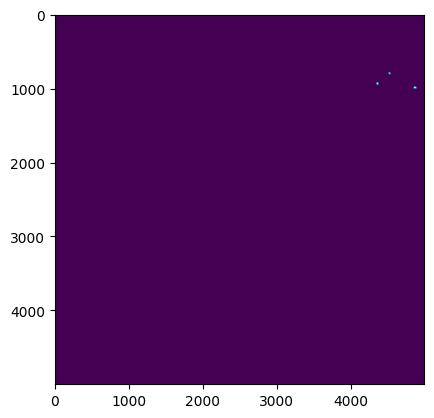

In [79]:
region_img = tifffile.imread(os.path.join(img_dir, "region_img.ome.tif"))

sub_pDC_mask= sub_pDC_mask[np.newaxis,...]
region_img = np.concatenate((region_img, sub_pDC_mask))

tifffile.imwrite(os.path.join(img_dir, "pDC_mask_test.tif"), region_img)

In [12]:
true_pos_quant = pDC_A_quant[pDC_A_quant["CellID"].isin(true_pos_cell_IDs)]

print(f"SiglecH -- Min: {np.min(true_pos_quant.SiglecH_intensity_median)}, Max:  {np.max(true_pos_quant.SiglecH_intensity_median)}")
print(f"B220    -- Min: {np.min(true_pos_quant.B220_intensity_median)}, Max:  {np.max(true_pos_quant.B220_intensity_median)}")
print(f"CD11c   -- Min: {np.min(true_pos_quant.CD11c_intensity_median)}, Max:  {np.max(true_pos_quant.CD11c_intensity_median)}")


## For pDC_A, validation cells could be (17_500, 2_500) to (19_000, 6_000)
    ## There should be a bunch of pDCs in this area.


SiglecH -- Min: 17.0, Max:  34.0
B220    -- Min: 10.0, Max:  13.0
CD11c   -- Min: 12.0, Max:  36.0


In [13]:
true_neg_quant = pDC_A_quant[pDC_A_quant["CellID"].isin(true_neg_cell_IDs)]
print(true_pos_quant.shape)

print(f"SiglecH -- Min: {np.min(true_neg_quant.SiglecH_intensity_median)}, Max:  {np.max(true_neg_quant.SiglecH_intensity_median)}")
print(f"B220    -- Min: {np.min(true_neg_quant.B220_intensity_median)}, Max:  {np.max(true_neg_quant.B220_intensity_median)}")
print(f"CD11c   -- Min: {np.min(true_neg_quant.CD11c_intensity_median)}, Max:  {np.max(true_neg_quant.CD11c_intensity_median)}")

(5, 18)
SiglecH -- Min: 7.0, Max:  7.0
B220    -- Min: 8.0, Max:  8.0
CD11c   -- Min: 26.0, Max:  36.0


In [14]:
print((np.min(pDC_A_quant.SiglecH_intensity_median), np.max(pDC_A_quant.SiglecH_intensity_median)))

(6.0, 57.0)
